In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

###  Importing Company_Data data

In [2]:
data = pd.read_csv('Company_Data.csv')
data.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [3]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

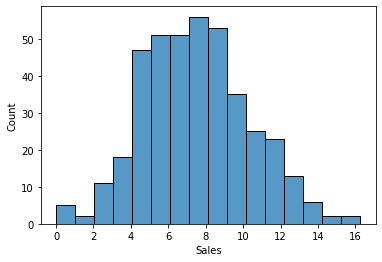

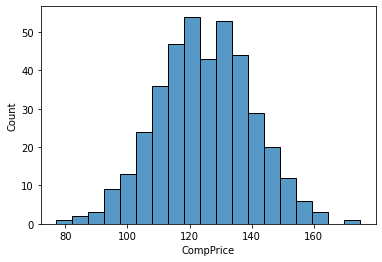

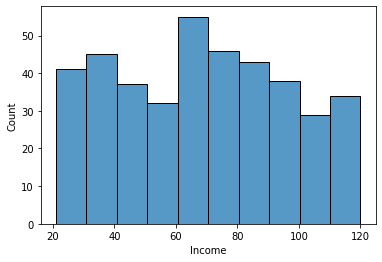

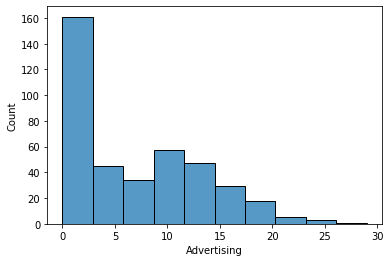

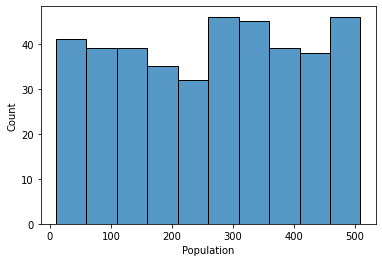

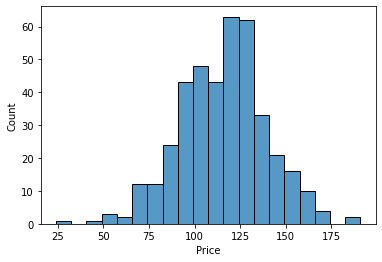

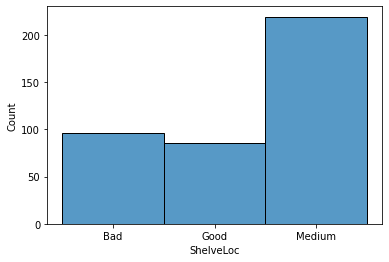

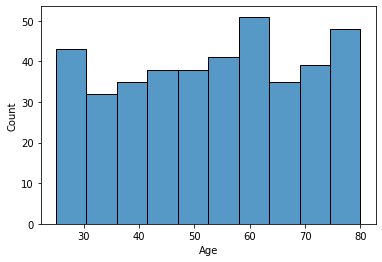

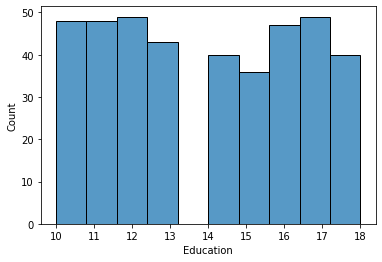

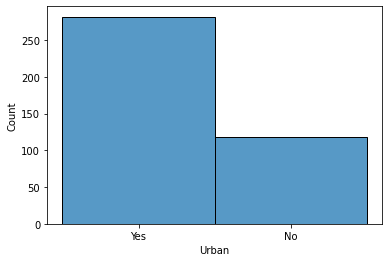

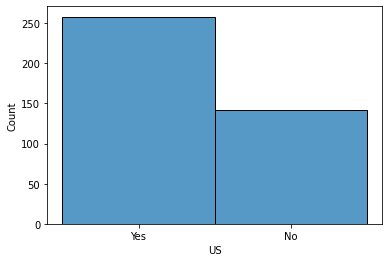

In [6]:
for col in data.columns:
    sns.histplot(data[col])
    plt.show()

In [7]:
data['High']= data.Sales.map(lambda x: 1 if x>7.5 else 0)

### converting categorical data


In [8]:
data['ShelveLoc']=data['ShelveLoc'].astype('category')
data['Urban']=data['Urban'].astype('category')
data['US']=data['US'].astype('category')

In [9]:
data.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
High              int64
dtype: object

###  converting category to numeric data

In [10]:
data['ShelveLoc']=data['ShelveLoc'].cat.codes
data['Urban']=data['Urban'].cat.codes
data['US']=data['US'].cat.codes

In [11]:
data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc         int8
Age              int64
Education        int64
Urban             int8
US                int8
High             int64
dtype: object

In [12]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


### Model building

In [13]:
label_encoder = preprocessing.LabelEncoder()

In [14]:
X = data.iloc[:,1:11]
Y = data.iloc[:,11]

In [15]:
print(X)

     CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  

In [16]:
print(Y)

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64


In [17]:
data['High'].unique()

array([1, 0], dtype=int64)

In [18]:
data.High.value_counts()

0    202
1    198
Name: High, dtype: int64

###  Splting data into trainig and testing data set

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 40)

###  Build decision tree classifire using entropy criteria

In [20]:
model = DecisionTreeClassifier(criterion ='entropy',max_depth=3)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

###  plot the decission tree

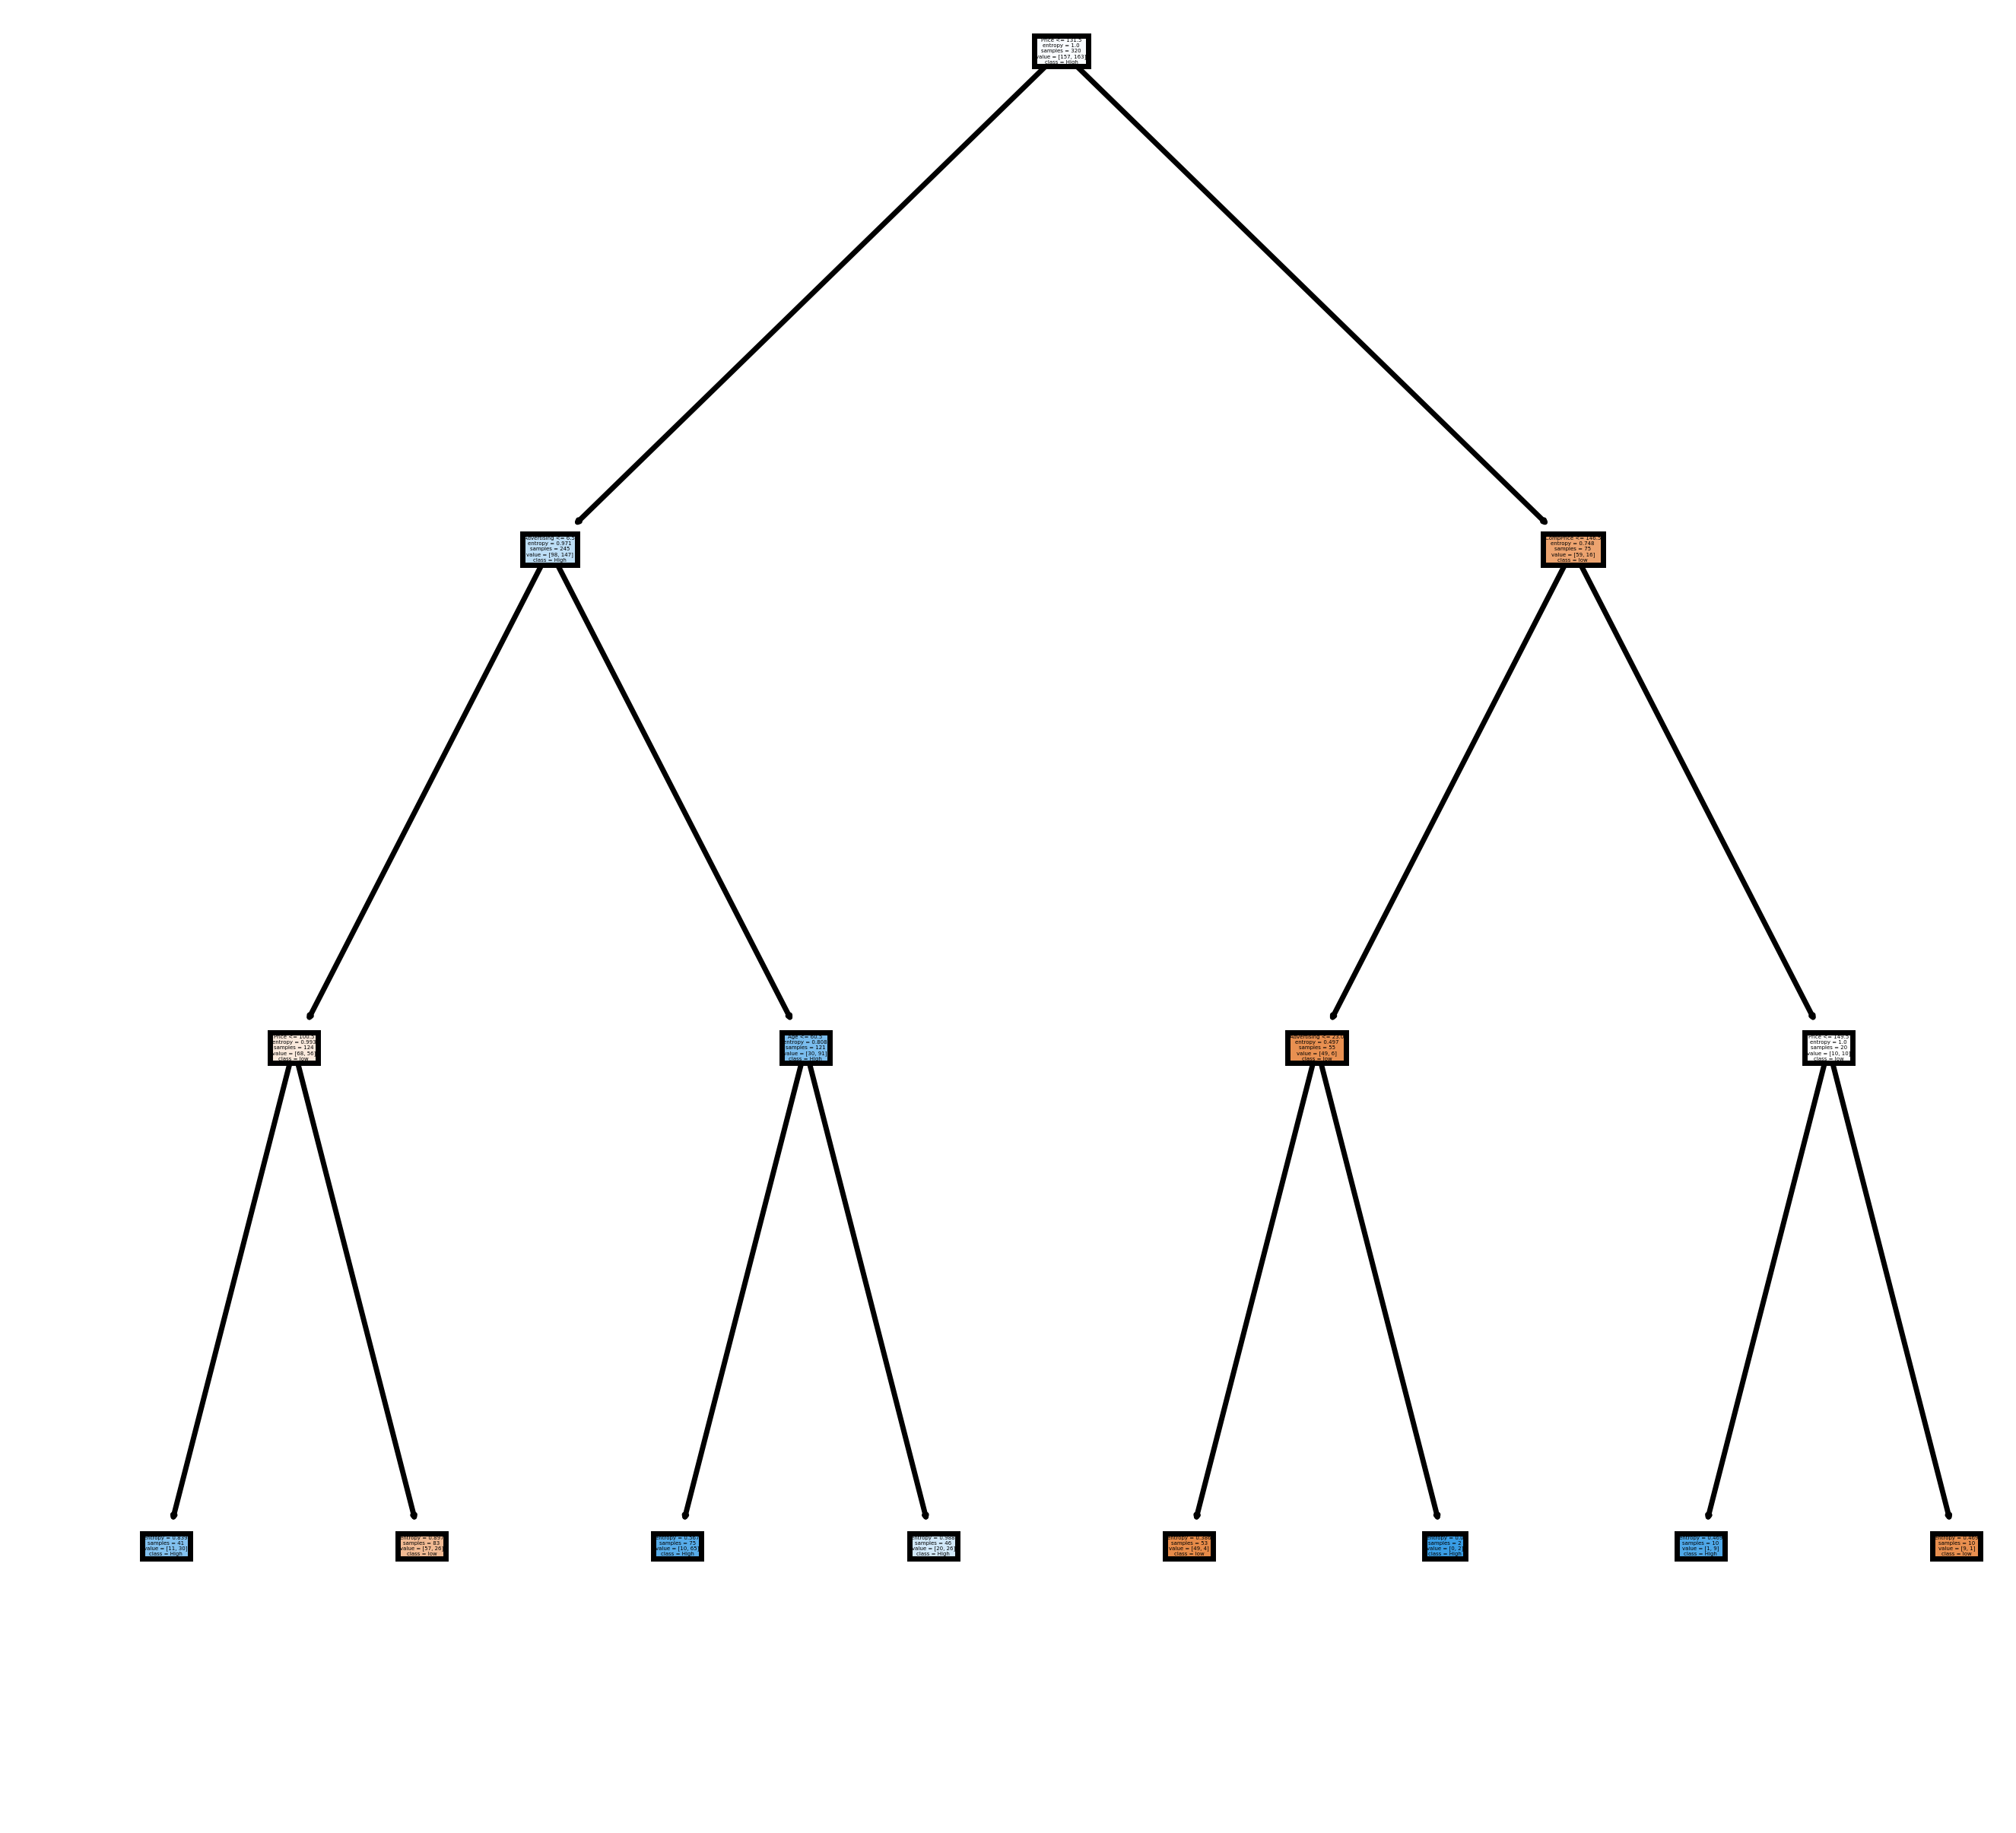

In [21]:
fn = X.columns
cn = ['low','High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (1,1), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score

In [25]:
acc = accuracy_score(Y_test,y_pred)
print(f' MOdel accuracy is : {acc}')

 MOdel accuracy is : 0.7125


<AxesSubplot:>

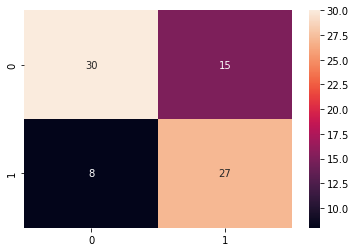

In [26]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test,y_pred),annot=True)

In [27]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)

In [28]:
model_gini.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [29]:
## predict the accuracy 
pred = model_gini.predict(X_test)
np.mean(pred == Y_test)

0.6875

In [30]:
# Decision tree as regration 
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [31]:
array = data.values
x = array[:,1:11]
y = array[:,11]

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state =50)

In [33]:
model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [34]:
pred = model.predict(x_test)
pred

array([0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.])

In [35]:
# find the accuracy
model.score(x_test,y_test)

-0.3277192982456141

###  Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

* Undergrad : person is under graduated or not
* Marital.Status : marital status of a person
* Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
* Work Experience : Work experience of an individual person
* Urban : Whether that person belongs to urban area or not



In [4]:
file = pd.read_csv("Fraud_check.csv")

In [5]:
file.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
file1 = file.rename({'Marital.Status':'M','Taxable.Income':'income','City.Population':'population','Work.Experience':'work'},axis = 1)

In [7]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Undergrad   600 non-null    object
 1   M           600 non-null    object
 2   income      600 non-null    int64 
 3   population  600 non-null    int64 
 4   work        600 non-null    int64 
 5   Urban       600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
file1.head()

,Undergrad,M,income,population,work,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
file1['Undergrad']=file1['Undergrad'].astype('category')
file1['M']=file1['M'].astype('category')
file1['Urban']=file1['Urban'].astype('category')

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
file1['Undergrad'] = label_encoder.fit_transform(file1['Undergrad'])
file1['M'] = label_encoder.fit_transform(file1['M'])
file1['Urban'] = label_encoder.fit_transform(file1['Urban'])

In [11]:
file1['Status']  = file1['income'].apply(lambda x : 'Risky' if x <= 30000 else 'Good')

In [12]:
#file1['Status'] = label_encoder.fit_transform(file1['Status'])
#file1['Status']

In [13]:
file1['Status'].value_counts()

Good     476
Risky    124
Name: Status, dtype: int64

In [14]:
file1.head()

,Undergrad,M,income,population,work,Urban,Status
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [15]:
x = file1[['Undergrad','M','population','work','Urban']]
y = file1.iloc[:,-1]

In [16]:
def x_norm(i):
    m = (i-i.min())/(i.max()-i.min())
    return m
x_norm = x_norm(x)

In [17]:
x_norm

,Undergrad,M,population,work,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0
...,...,...,...,...,...
595,1.0,0.0,0.078811,0.233333,1.0
596,1.0,0.0,0.170058,0.066667,1.0
597,0.0,0.0,0.737240,0.000000,1.0
598,1.0,0.5,0.886810,0.566667,0.0


In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size = 0.2,shuffle = True)

In [19]:
model = DecisionTreeClassifier(criterion ='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

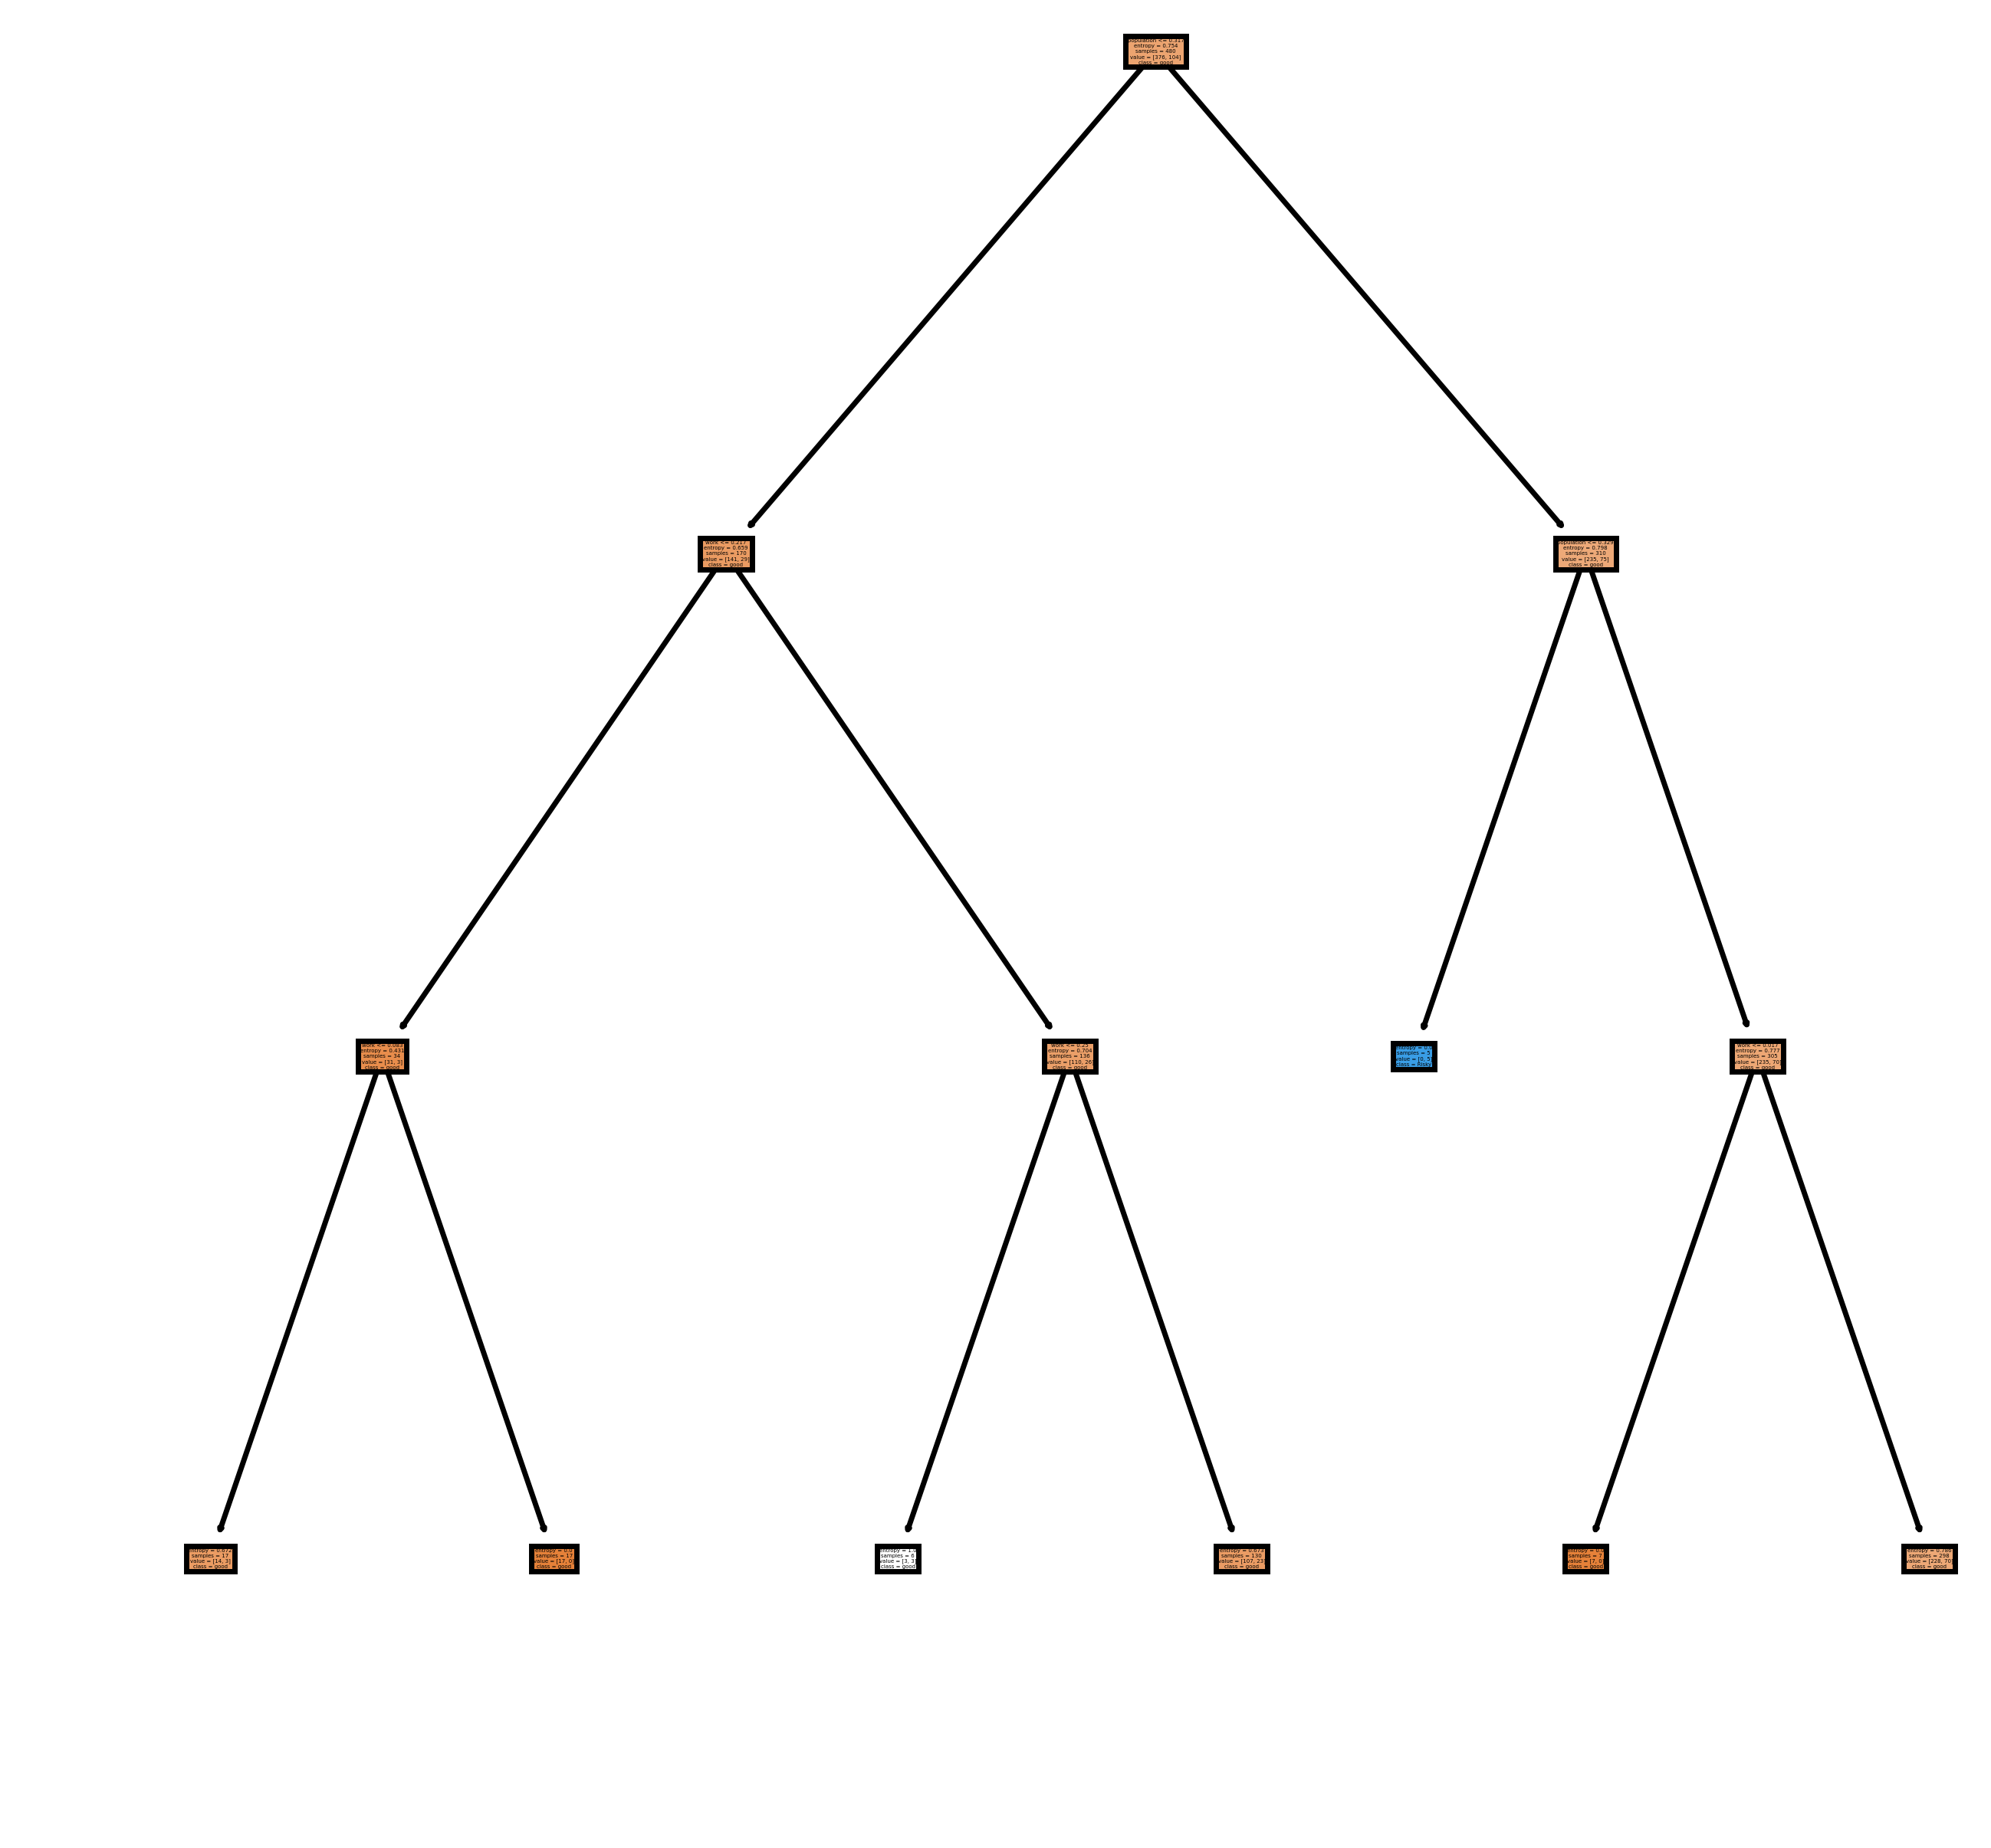

In [20]:
fn = x.columns
cn = ['good','Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (1,1), dpi=500)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [21]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
print(f' MOdel accuracy is : {acc}')

 MOdel accuracy is : 0.825


<AxesSubplot:>

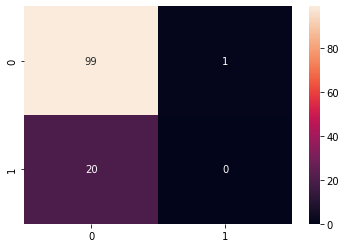

In [23]:
from sklearn.metrics import confusion_matrix

import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)